# Why do we need nonlinear solvers?

> Given a continuous function $f(x)$, the problem is to find a point $x^*$ such that $f(x^*) = 0$. That is, $x^*$ is a solution of the equation $f(x) = 0$ and is called a **root of $f(x)$**.

## Example

1.  The linear equation $f(x) = a x + b = 0$ has a single solution at $x^* = -\frac{b}{a}$.

2.  The quadratic equation $f(x) = a x^2 + b x + c = 0$ is nonlinear , but simple enough to have a known formula for the solutions

    $$
    x^* = \frac{-b \pm \sqrt{b^2 - 4ac}}{2a}.
    $$

3.  A general nonlinear equation $f(x) = 0$ rarely has a formula like those above which can be used to calculate its roots.

## Example from last year's past paper

We want to solve the quadratic equation

$$f(x) = x^2 -(m+\frac{1}{m}) x + 1 = 0$$

for large values of $m$. The exact solutions are $m$ and $\frac{1}{m}$.

In [1]:
# implementation of quadratic formula
import numpy as np

def quad(a, b, c):
    """
    Return the roots of the quadratic polynomial a x^2 + b x + c = 0.
    """
    d = np.sqrt(b * b - 4 * a * c)
    return (- b + d) / (2 * a), (- b - d) / (2 * a)

In [2]:
# test for m = 1e8
m = 1e8
roots = quad(1, -(m + 1/m), 1)

print(f"{roots=}")

roots=(100000000.0, 1.4901161193847656e-08)


In [3]:
# absolute and relative errors
exact_roots = (m, 1/m)

abs_error = (abs(roots[0] - exact_roots[0]),
             abs(roots[1] - exact_roots[1]))
rel_error = (abs_error[0] / m, abs_error[1] / (1/m))

print(f"{abs_error=}")
print(f"{rel_error=}")

abs_error=(0.0, 4.901161193847656e-09)
rel_error=(0.0, 0.49011611938476557)


## The need for implicit time stepping methods (1)

Consider the differential equation

$$
x'(t) = - 2 x(t), \qquad \text{ subject to } \quad x(0) = 1.
$$

In [4]:
import numpy as np

def f(x, t):
    return -2 * x

def euler(x0, dt, T):
    # initialise memory
    n = int(T/dt)
    x = np.empty(n+1)
    t = np.empty(n+1)
    
    # starting values
    x[0] = x0
    t[0] = 0.0
    
    # do the time loop
    for j in range(n):
        x[j+1] = x[j] + dt * f(x[j], t[j])
        t[j+1] = t[j] + dt
        
    return x, t

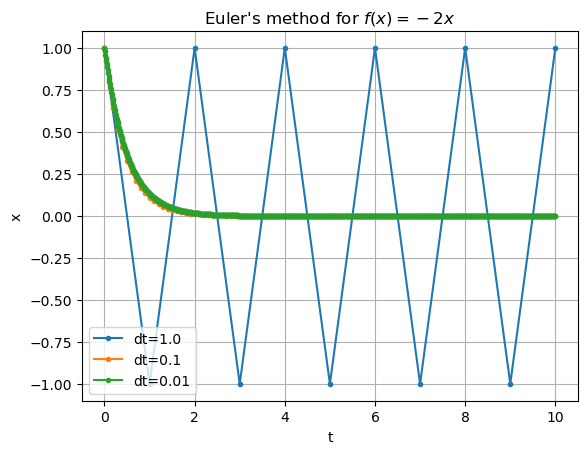

In [5]:
from matplotlib import pyplot as plt

x, t = euler(x0=1.0, dt=1.0, T=10.0)
plt.plot(t, x, '.-', label=f"dt=1.0")

x, t = euler(x0=1.0, dt=0.1, T=10.0)
plt.plot(t, x, '.-', label=f"dt=0.1")

x, t = euler(x0=1.0, dt=0.01, T=10.0)
plt.plot(t, x, '.-', label=f"dt=0.01")

plt.title("Euler's method for $f(x) = -2x$")
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.grid()

Recall explicit Euler says:

$$
x^{(j)} = x^{(j-1)} + \Delta t f(t^{(j-1)}, x^{(j-1)})
$$


Consider instead the **implicit Euler method**:

$$
x^{(j)} = x^{(j-1)} + \Delta t f(t^{(j)}, x^{(j)})
$$

We can't simply evaluate the right hand side since we don't know $x^{(j)}$ yet!

For $f(x, t) = -2x$, we can compute that

$$
\begin{aligned}
x^{(j)} & = x^{(j-1)} + \Delta t f(t^{(j)}, x^{(j)}) \\
        & = x^{(j-1)} - 2 \Delta t x^{(j)} \\
(1 + 2 \Delta t) x^{(j)} & = x^{(j-1)} \\
x^{(j)} & = 1 / (1 + 2 \Delta t) x^{(j-1)}.
\end{aligned}
$$

In [6]:
def implicit_euler(x0, dt, T):
    # initialise memory
    n = int(T/dt)
    x = np.empty(n+1)
    t = np.empty(n+1)
    
    # starting values
    x[0] = x0
    t[0] = 0.0
    
    # do the time loop
    for j in range(n):
        x[j+1] = x[j] / (1.0 + 2.0 * dt)
        t[j+1] = t[j] + dt
        
    return x, t

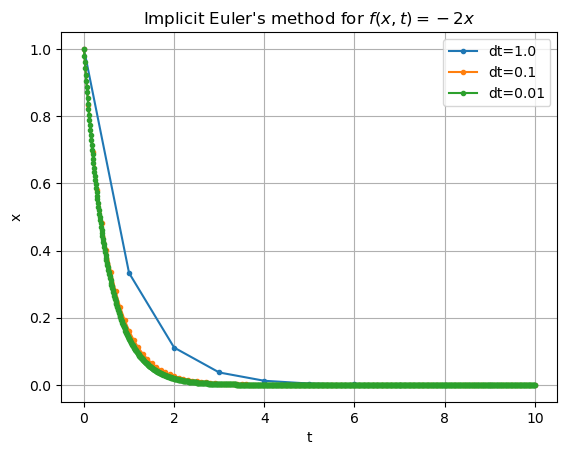

In [7]:
x, t = implicit_euler(x0=1.0, dt=1.0, T=10.0)
plt.plot(t, x, '.-', label=f"dt=1.0")

x, t = implicit_euler(x0=1.0, dt=0.1, T=10.0)
plt.plot(t, x, '.-', label=f"dt=0.1")

x, t = implicit_euler(x0=1.0, dt=0.01, T=10.0)
plt.plot(t, x, '.-', label=f"dt=0.01")

plt.title("Implicit Euler's method for $f(x, t) = -2x$")
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.grid()

## The need for implicit time stepping methods (2)

Consider the differential equation

$$
x'(t) = - 2 x(t)^3 \exp(-(1-x(t)^2)), \qquad \text{ subject to } \quad x(0) = 1.
$$

In [8]:
def f(x, t):
    return -2 * x**3 * np.exp(-(1-x**2))

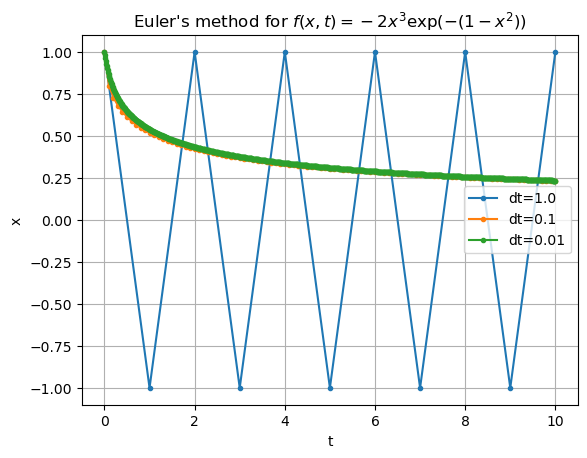

In [9]:
x, t = euler(x0=1.0, dt=1.0, T=10.0)
plt.plot(t, x, '.-', label=f"dt=1.0")

x, t = euler(x0=1.0, dt=0.1, T=10.0)
plt.plot(t, x, '.-', label=f"dt=0.1")

x, t = euler(x0=1.0, dt=0.01, T=10.0)
plt.plot(t, x, '.-', label=f"dt=0.01")

plt.title("Euler's method for $f(x, t) = - 2 x^3 \exp(-(1-x^2))$")
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.grid()

We might wish to use an implicit method, but how can we undo $f$??

> Use a nonlinear solver!

## Other difficult problems (1)


The following formula allows the monthly repayments ($M$) on a compound interest mortgage (for a borrowing of $P$) to be calculated based upon an annual interest rate of $r$% and $n$ monthly payments ([more details](http://www.fonerbooks.com/interest.htm)).

$$
M = P \frac{\frac{r}{1200} \left(1 + \frac{r}{1200}\right)^n}{\left(1 + \frac{r}{12000}\right)^n - 1}.
$$

-   Suppose that we wish to work out how many monthly repayments of £1,000 would be required to repay a mortgage of £150,000 at an annual rate of 5%.

-   This would require us to solve $f(n) = 0$ where $f(n) = 1000 - 150000 \frac{\frac{5}{1200}(1+\frac{5}{1200})^n}{(1+\frac{5}{1200})^n - 1}$.

## Other difficult problems (2)

Consider the NACA0012 prototype wing section, which is often used for testing computational methods for simulating flows in aerodynamics

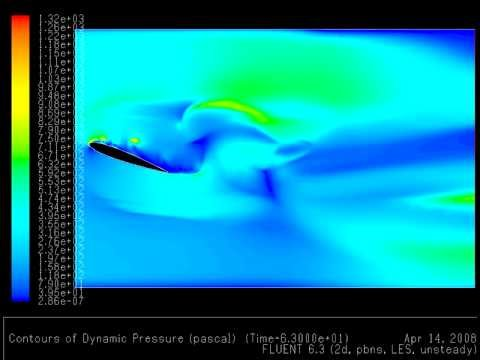

In [10]:
from IPython.display import YouTubeVideo
YouTubeVideo("wcahAqSFZ8k",560,315,rel=0)

The profile is given by

$$
y^{\pm}(x) = \pm(0.2969 \sqrt{x} - 0.126 x - 0.3516 x^2 + 0.2843 x^3 - 0.1015 x^4),
$$

in which $+$ gives the upper surface and $-$ gives the lower surface.

Find the point $x$ at which the thickness $t$ of the aerofoil is $0.1$, i.e. solve $f(x) = 0$ where $f(x) = y^+(x) - y^-(x) - 0.1$.

-   There will be two solutions for $x$ for this value of $t$.

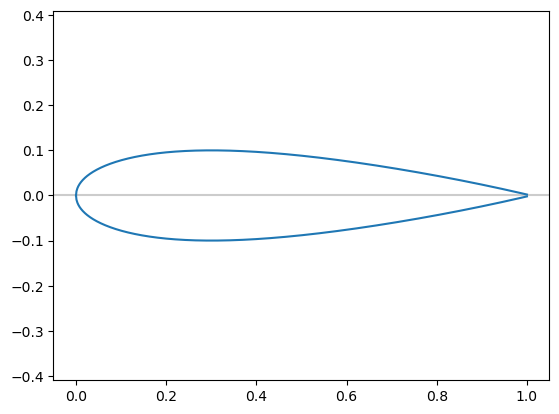

In [11]:
import matplotlib.pyplot as plt
import numpy as np


def f(x):
    yp = -0.1015 * np.power(x, 4) \
             + 0.2843 * np.power(x, 3) \
             - 0.3516 * np.power(x, 2) \
             - 0.126 * x \
             + 0.2969 * np.sqrt(x)
    return yp

plt.axhline(0,color='0.8') # x = 0

t = np.linspace(0, 1, 1000)
p = plt.plot(t, f(t))
plt.plot(t, -f(t), color=p[0].get_color())
plt.axis('equal')

plt.show()

# Back to time stepping with bisection...

In [12]:
# Simply bisection implementation
def bisection(func, a, b, tol=1.0e-10):
    # Starting values
    fa = func(a)
    fb = func(b)
    
    while b - a > tol:
        # Find new mid point
        c = (a+b)/2
        fc = func(c)
        
        # if root is in left half of interval
        if fa * fc < 0.0:
            # move right end
            b = c
            fb = fc
        else:
            # otherwise,
            # move the left end
            a = c
            fa = fc
            
    return (a+b)/2

In [13]:
def f(x, t):
    return -2 * x**3 * np.exp(-(1-x**2))

In [14]:
def implicit_euler(x0, dt, T):
    # initialise memory
    n = int(T/dt)
    x = np.empty(n+1)
    t = np.empty(n+1)
    
    # starting values
    x[0] = x0
    t[0] = 0.0
    
    # time loop
    for j in range(n):
        t[j+1] = t[j] + dt
        
        # nonlinear function to solve each time step
        def update(xnew):
            return xnew - x[j] - dt * f(xnew, t[j+1])
        
        # perform the nonlinear solve
        x[j+1] = bisection(update, -1.0, 1.0)
        
    return x, t

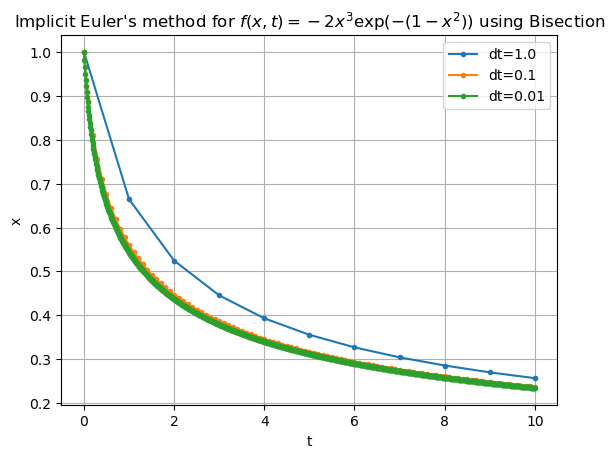

In [15]:
x, t = implicit_euler(x0=1.0, dt=1.0, T=10.0)
plt.plot(t, x, '.-', label=f"dt=1.0")

x, t = implicit_euler(x0=1.0, dt=0.1, T=10.0)
plt.plot(t, x, '.-', label=f"dt=0.1")

x, t = implicit_euler(x0=1.0, dt=0.01, T=10.0)
plt.plot(t, x, '.-', label=f"dt=0.01")

plt.title("Implicit Euler's method for $f(x, t) = - 2 x^3 \exp(-(1-x^2))$ using Bisection")
plt.xlabel('t')
plt.ylabel('x')
plt.legend()
plt.grid()